Homework 2 "Algorithmic trading" course.

Building portfolio.

Student name: Madina Kudaibergenova



---



Method to determine weights: Sharpe ratio

Data source: Yahoo finance

Monte Carlo simulations to assign random weights to the stocks and calculate volatility

Start date is 4th of January 2021, end date is 12th of April 2021

Only close price was used

In [2]:
# importing necessary libraries
import ssl # TLS/SSL wrapper for socket objects
from functools import wraps 
import numpy as np # perform math calculations
import pandas as pd # data analysis
import pandas_datareader.data as web # collect data from resources 
import matplotlib.pyplot as plt # draw graphics

In [ ]:
# this code is based on https://github.com/mekriti/Portfolio-diversification-using-Sharpe-Ratio

In [83]:
# setting up connection
def sslwrap(func):
    @wraps(func)
    def bar(*args, **kw):
        kw['ssl_version'] = ssl.PROTOCOL_TLSv1
        return func(*args, **kw)
    return bar
ssl.wrap_socket = sslwrap(ssl.wrap_socket)

In [113]:
# list of stocks in portfolio
stocks = ['BHP', 'DE', 'FE', 'GOOG','GS','JNJ', 'KO', 'T', 'WMT', 'XOM']

# download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks,data_source='yahoo',start='01/04/2021', end='04/12/2021')['Close']
 
# convert daily stock prices into daily returns
returns = data.pct_change()

In [86]:
# printing data (I have compared it to the given, and they are equal)
data

Symbols,BHP,DE,FE,GOOG,GS,JNJ,KO,T,WMT,XOM
Date,,,,,,,,,,
2021-01-04,67.349998,267.640015,29.510000,1728.239990,265.000000,156.500000,52.759998,29.440001,146.529999,41.500000
2021-01-05,69.500000,274.279999,29.840000,1740.920044,270.929993,158.339996,52.180000,29.260000,145.750000,43.500000
2021-01-06,71.709999,290.359985,30.299999,1735.290039,285.549988,159.830002,50.520000,29.830000,146.660004,44.610001
2021-01-07,73.180000,299.730011,29.629999,1787.250000,291.649994,160.369995,49.959999,29.910000,146.649994,44.959999
2021-01-08,73.459999,293.910004,29.910000,1807.209961,290.079987,160.039993,51.080002,29.020000,146.630005,45.459999
...,...,...,...,...,...,...,...,...,...,...
2021-04-06,69.870003,375.609985,34.799999,2224.750000,327.059998,163.389999,53.189999,30.980000,140.100006,56.340000
2021-04-07,71.150002,374.790009,35.029999,2249.679932,326.549988,163.610001,53.279999,30.930000,139.800003,56.590000
2021-04-08,71.230003,374.070007,34.990002,2265.439941,331.140015,162.970001,53.119999,30.000000,139.710007,56.000000


In [123]:
# calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

# set number of runs of random portfolio weights
num_portfolios = 10000
 
# set up array to hold results
# Array to hold weight for each stock
results = np.zeros((3+len(stocks),num_portfolios))

In [124]:
for i in range(num_portfolios):
    # select random weights for portfolio holdings
    weights = np.array(np.random.random(10))
    # normalizing weights
    weights /= np.sum(weights)
 
    # calculate portfolio return and volatility(which is a standard deviation)
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))*np.sqrt(252)
 
    # store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    # store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = ( results[0,i] )/ (results[1,i] )
    # iterate through the weight vector and add data to results array
    for j in range(0,10):
        results[j+3,i] = weights[j]

           ret     stdev    sharpe  ...         T       WMT       XOM
0     0.519692  0.138152  3.761745  ...  0.063268  0.050076  0.151668
1     0.563790  0.176284  3.198186  ...  0.241637  0.027683  0.208538
2     0.558921  0.155225  3.600723  ...  0.081733  0.102511  0.162133
3     0.594803  0.158013  3.764258  ...  0.112395  0.080554  0.122099
4     0.251002  0.136331  1.841118  ...  0.122608  0.202173  0.033716
...        ...       ...       ...  ...       ...       ...       ...
9995  0.735620  0.163710  4.493432  ...  0.033142  0.079468  0.159693
9996  0.522326  0.134961  3.870213  ...  0.141034  0.136323  0.015719
9997  0.357072  0.145080  2.461215  ...  0.271578  0.117065  0.053772
9998  0.562655  0.159647  3.524361  ...  0.036129  0.137689  0.154538
9999  0.606220  0.153118  3.959166  ...  0.135434  0.098262  0.100996

[10000 rows x 13 columns]


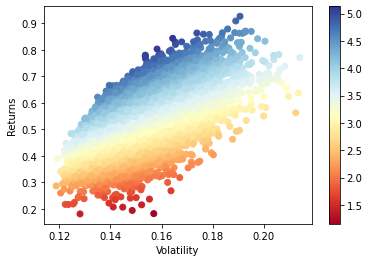

In [125]:
results_frame = pd.DataFrame(results.T, columns=['ret','stdev','sharpe',stocks[0], stocks[1], 
                                                 stocks[2], stocks[3], stocks[4], stocks[5], 
                                                 stocks[6], stocks[7], stocks[8], stocks[9]])
# locate position of portfolio with highest Sharpe Ratio
maxsp = results_frame.iloc[results_frame[['sharpe']].idxmax()]
# locate positon of portfolio with minimum standard deviation
minvp = results_frame.iloc[results_frame['stdev'].idxmin()]
print(results_frame)
# create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c = results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

In [126]:
maxsp_array = pd.DataFrame.to_numpy(maxsp) # converting DataFrame to numpy for convenience

In [133]:
# print the line that was chosen as a max Sharpe Ratio
maxsp

,ret,stdev,sharpe,BHP,DE,FE,GOOG,GS,JNJ,KO,T,WMT,XOM
1914,0.843678,0.164372,5.132734,0.005239,0.13936,0.210345,0.206609,0.112795,0.008684,0.131324,0.012269,0.007295,0.16608


In [136]:
# weights for each company in portfolio
print("BHP: ", np.round(maxsp_array[0][3],6)," / DE: ", np.round(maxsp_array[0][4],6), 
      " / FE: ", np.round(maxsp_array[0][5],6), " / GOOG: ", np.round(maxsp_array[0][6],6),'\n'
      "GS: ", np.round(maxsp_array[0][7],6), " / JNJ: ", np.round(maxsp_array[0][8],6),
      " / KO: ", np.round(maxsp_array[0][9],6), " / T: ", np.round(maxsp_array[0][10],6),'\n'
      "WMT: ", np.round(maxsp_array[0][11],6), " / XOM: ", np.round(maxsp_array[0][12],6))

BHP:  0.005239  / DE:  0.13936  / FE:  0.210345  / GOOG:  0.206609 
GS:  0.112795  / JNJ:  0.008684  / KO:  0.131324  / T:  0.012269 
WMT:  0.007295  / XOM:  0.16608


In [130]:
print("Expected portfolio return: ", np.round(100*maxsp_array[0][0],2), "%")
print("Expected portfolio volatility: ", np.round(100*np.average(minvp),2), "%")
print("Maximum Sharpe ration of the portfolio: ", np.round(np.max(results[2]),2))

Expected portfolio return:  84.37 %
Expected portfolio volatility:  29.32 %
Maximum Sharpe ration of the portfolio:  5.13
